In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read data

In [2]:
# data set from https://www.kaggle.com/datasets/tunguz/big-five-personality-test
df = pd.read_csv('data/IPIP-FFM-data-8Nov2018/data-final.csv', delimiter='\t')
print(df.shape)
df.head()

(1015341, 110)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


### Data pre-processing 

Some questions/statements, such as EXT2 ("I don't talk a lot") are "inverted" in the sense that a low score should contribute more to extraversion. We find these and invert the scores (1 -> 5, 2 -> 4...).

In [3]:
# first, drop columns that are not answers to the test questions or IPC
columns_to_keep = [col for col in df.columns if "_E" not in col and col.isupper()]
df_clean = df[columns_to_keep]

# drop row if number of records from the user's IP address != 1
df_clean = df_clean[df_clean['IPC'] == 1]
df_clean = df_clean.drop(columns=['IPC'])

# remove any rows with missing values or values outside the 1-5 range
mask = df_clean.isna().any(axis=1) | ((df_clean < 1) | (df_clean > 5)).any(axis=1)
df_clean = df_clean[~mask]

inverse_score = {1:5, 2:4, 3:3, 4:2, 5:1}
inverse_questions = ["EXT2", "EXT4", "EXT6", "EXT8", "EXT10",
                    "EST2", "EST4",
                    "AGR1", "AGR3", "AGR5", "AGR7", 
                    "CSN2", "CSN4", "CSN6", "CSN8", 
                    "OPN4", "OPN6"]

# Invert scores for specified columns
df_clean[inverse_questions] = df_clean[inverse_questions].replace(inverse_score)

print(df_clean.shape)
df_clean.head()

(603322, 50)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,...,5.0,1.0,4.0,5.0,4.0,5.0,5.0,3.0,4.0,5.0
1,3.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,1.0,2.0,4.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,1.0,...,5.0,1.0,2.0,5.0,4.0,4.0,5.0,3.0,4.0,4.0
3,2.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0,...,4.0,2.0,5.0,4.0,3.0,5.0,4.0,4.0,3.0,3.0
5,3.0,3.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,...,5.0,1.0,5.0,5.0,3.0,5.0,5.0,4.0,5.0,2.0


### Normal distributions

First, we check normality using Q-Q plots. If the data points roughly fall along a straight diagonal line, 
we assume the data to be normally distributed.

Secondly, we plot the normal distributions of the big 5 traits.

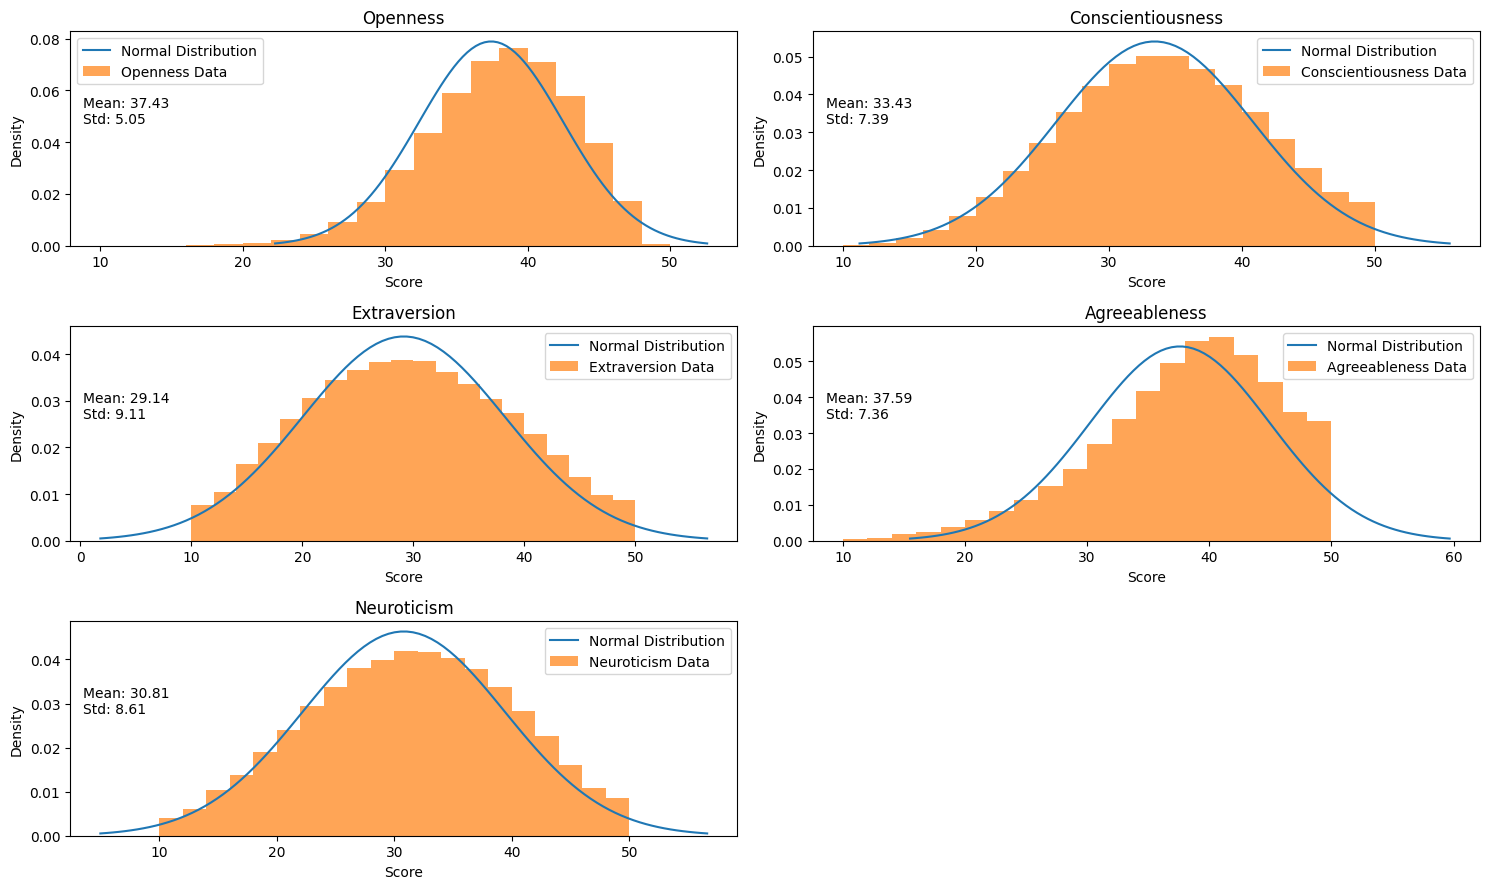

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN6,OPN7,OPN8,OPN9,OPN10,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,...,5.0,5.0,3.0,4.0,5.0,41.0,32.0,46.0,39.0,24.0
1,3.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,5.0,4.0,2.0,5.0,3.0,33.0,37.0,20.0,44.0,25.0
2,2.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,1.0,...,4.0,5.0,3.0,4.0,4.0,37.0,34.0,25.0,42.0,26.0
3,2.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0,...,5.0,4.0,4.0,3.0,3.0,37.0,25.0,26.0,38.0,29.0
5,3.0,3.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,...,5.0,5.0,4.0,5.0,2.0,40.0,37.0,32.0,38.0,22.0


In [7]:
traits = {
    'Openness': [f'OPN{i}' for i in range(1, 11)],
    'Conscientiousness': [f'CSN{i}' for i in range(1, 11)],
    'Extraversion': [f'EXT{i}' for i in range(1, 11)],
    'Agreeableness': [f'AGR{i}' for i in range(1, 11)],
    'Neuroticism': [f'EST{i}' for i in range(1, 11)]
}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes = axes.flatten()

# For each trait, calculate the total score, mean, and std deviation and plot the Gaussian distribution
for (trait, columns), ax in zip(traits.items(), axes):
    df_clean[trait] = df_clean[columns].sum(axis=1)
    mu = df_clean[trait].mean()
    sigma = df_clean[trait].std()
    
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax.plot(x, (1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp(-(x - mu)**2 / (2 * sigma**2))), label=f'Normal Distribution')
    ax.hist(df_clean[trait], density=True, bins=20, alpha=0.7, label=f'{trait} Data')
    
    ax.legend()
    ax.set_title(f'{trait}')
    ax.set_xlabel('Score')
    ax.set_ylabel('Density')
    
    # Display the mean and standard deviation on the side
    ax.text(0.02, 0.70, f'Mean: {mu:.2f}\nStd: {sigma:.2f}', transform=ax.transAxes, verticalalignment='top')

axes[5].axis('off')

plt.tight_layout()
plt.show()

df_clean.head()